In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image
from math import exp

In [2]:
def create_random_image(n, a = 0.5):
    tab = []
    t = int(n*a)
    for _ in range(n):
        temp = [False for _ in range(t)]  # czarny
        temp2 = [True for _ in range(n - t)]  # bialy
        temp += temp2
        random.shuffle(temp)
        tab.append(temp)
    return np.array(tab)


In [3]:
def generate_temp_tab(max_temp, min_temp, temp_func):
    temp = max_temp
    tab = []
    while temp > min_temp:
        tab.append(temp)
        temp = temp_func(temp)
    return tab

In [49]:
def reform_image_using_sa(image, pos_func, max_temp, min_temp, temp_func, cost_func_one, inside_loop):
    temps = generate_temp_tab(max_temp, min_temp, temp_func)
    pos = np.asarray(image).copy()

    start_energy = cost_all_image(pos, cost_func_one)
    last_saved_energy = start_energy
    # ans = pos
    # ans_energy = energy1
    # print("XD")
    # print(f"Start energy: {start_energy}")
    with open(f"save/image_{0}", "w") as file:
        np.savetxt(file, pos)
    for i, temp in enumerate(temps):
        # print(f"temp: {temp}")
        for _ in range(inside_loop):
            position_to_switch = pos_func(pos)
            energy_before_switch = cost_func_one(pos, position_to_switch[0]) + cost_func_one(pos, position_to_switch[1])
            switch_two(pos, position_to_switch)
            energy_after_switch = cost_func_one(pos, position_to_switch[0]) + cost_func_one(pos, position_to_switch[1])
            # print(f"energy_before_switch: {energy_before_switch}")
            # print(f"energy_after_switch: {energy_after_switch}")

            delta_energy =  energy_after_switch - energy_before_switch

            # REVERSE NOT UPDATE!
            # if change not accepted, reverse
            if delta_energy > 0 and exp(-delta_energy / temp) < random.uniform(0, 1):
                switch_two(pos, position_to_switch)

        save_to_file_cooldown = 10_000
        if i % save_to_file_cooldown == 0:
            print(i, temp, cost_all_image(pos, cost_func_one))
            if (x := cost_all_image(pos, cost_func_one)) < last_saved_energy:
                last_saved_energy = x
                # print(f"Saved to file {i//save_to_file_cooldown}. Unhappiness {x}")
                with open(f"save/image_{i//save_to_file_cooldown}", "w") as file:
                    np.savetxt(file, pos)

    # print(f"Start energy: {start_energy}")
    # print(f"End energy: {cost_all_image(pos, cost_func_one)}")

    draw_temp_func(temps)
    return pos

def switch_two(image, pos_to_switch):
    x1, y1 = pos_to_switch[0]
    image[x1][y1] = not image[x1][y1]

    x2, y2 = pos_to_switch[1]
    image[x2][y2] = not image[x2][y2]


# def cost_want_close_same_type_cross_only(image):
#     cost = 0
#     n = len(image)
#     # outside
#     # for i in range(0, n, 2):
#     for i in range(0, n):
#         # left
#         if image[i][0] != image[i][1]:
#             cost += 1
#         # right
#         if image[i][n - 1] != image[i][n - 2]:
#             cost += 1
#         # top
#         if image[0][i] != image[1][i]:
#             cost += 1
#         # bot
#         if image[n - 1][i] != image[n - 2][i]:
#             cost += 1
#
#     # inside
#     # for i in range(1, n - 1, 2):
#     #     for j in range(i % 2, n - 1, 2):
#     for i in range(1, n - 1):
#         for j in range(1, n - 1):
#             t = image[i][j]
#             if t != image[i + 1][j]:
#                 cost += 1
#             if t != image[i][j + 1]:
#                 cost += 1
#             if t != image[i - 1][j]:
#                 cost += 1
#             if t != image[i][j - 1]:
#                 cost += 1
#     return cost


# def cost_want_close_different_type_cross_only(image):
#     cost = 0
#     n = len(image)
#     # outside
#     # for i in range(0, n, 2):
#     for i in range(0, n):
#         # left
#         if image[i][0] == image[i][1]:
#             cost += 1
#         # right
#         if image[i][n - 1] == image[i][n - 2]:
#             cost += 1
#         # top
#         if image[0][i] == image[1][i]:
#             cost += 1
#         # bot
#         if image[n - 1][i] == image[n - 2][i]:
#             cost += 1
#
#     # inside
#     # for i in range(1, n - 1, 2):
#     #     for j in range(i % 2, n - 1, 2):
#     for i in range(1, n - 1):
#         for j in range(1, n - 1):
#             t = image[i][j]
#             if t == image[i + 1][j]:
#                 cost += 1
#             if t == image[i][j + 1]:
#                 cost += 1
#             if t == image[i - 1][j]:
#                 cost += 1
#             if t == image[i][j - 1]:
#                 cost += 1
#     return cost

def cost_one_want_close_different_type_cross_only(image, pos):
    energy = 0
    n = len(image)
    x, y = pos
    pos1 = image[x][y]
    if pos1 == image[(x + 1) % n][y]:
        energy += 1
    if pos1 == image[x][(y + 1) % n]:
        energy += 1
    if pos1 == image[(x - 1) % n][y]:
        energy += 1
    if pos1 == image[x][(y - 1) % n]:
        energy += 1

    return energy

def cost_one_want_close_same_type_cross_only(image, pos):
    energy = 0
    n = len(image)
    x, y = pos
    pos1 = image[x][y]
    if pos1 != image[(x + 1) % n][y]:
        energy += 1
    if pos1 != image[x][(y + 1) % n]:
        energy += 1
    if pos1 != image[(x - 1) % n][y]:
        energy += 1
    if pos1 != image[x][(y - 1) % n]:
        energy += 1
        
    return energy


def cost_one_want_close_same_circle(image, pos):
    energy = 0
    n = len(image)
    x, y = pos
    pos1 = image[x][y]
    if pos1 != image[(x + 1) % n][y]:
        energy += 1
    if pos1 != image[x][(y + 1) % n]:
        energy += 1
    if pos1 != image[(x - 1) % n][y]:
        energy += 1
    if pos1 != image[x][(y - 1) % n]:
        energy += 1

    if pos1 != image[(x + 1) % n][(y + 1) % n]:
        energy += 1
    if pos1 != image[(x - 1) % n][(y + 1) % n]:
        energy += 1
    if pos1 != image[(x + 1) % n][(y - 1) % n]:
        energy += 1
    if pos1 != image[(x - 1) % n][(y - 1) % n]:
        energy += 1

    return energy

def cost_one_want_lr_same_ud_diff(image, pos):
    energy = 0
    n = len(image)
    x, y = pos
    pos1 = image[x][y]
    if pos1 == image[(x + 1) % n][y]:
        energy += 1
    if pos1 != image[x][(y + 1) % n]:
        energy += 1
    if pos1 == image[(x - 1) % n][y]:
        energy += 1
    if pos1 != image[x][(y - 1) % n]:
        energy += 1

    return energy

def cost_one_u_diff_lrd_same(image, pos):
    energy = 0
    n = len(image)
    x, y = pos
    pos1 = image[x][y]
    if x + 1 < n and pos1 != image[x + 1][y]:  # down
        energy += 1
    if y + 1 < n and pos1 != image[x][y + 1]:  # right
        energy += 1
    if x - 1 > 0 and pos1 == image[x - 1][y]:  # up
        energy += 1
    if y - 1 > 0 and pos1 != image[x][y - 1]:  # left
        energy += 1

    return energy

def cost_one_labitynt_like(image, pos):
    """This does not work"""
    energy = 0
    n = len(image)
    x, y = pos
    pos1 = image[x][y]
    if x + 1 < n and pos1 != image[x + 1][y]:  # down
        energy += 1
    if y + 1 < n and pos1 != image[x][y + 1]:  # right
        energy += 1
    if x - 1 > 0 and pos1 == image[x - 1][y]:  # up
        energy += 1
    if y - 1 > 0 and pos1 != image[x][y - 1]:  # left
        energy += 1

    return energy % 2


def cost_all_image(image, cost_func_one):
    n = len(image)
    energy = 0
    for i in range(n):
        for j in range(n):
            energy += cost_func_one(image, (i, j))
    return energy

    
def new_switch(image):
    n = len(image)
    cross_neighbours = [(0, 1), (1, 0), (-1, 0), (0, -1)]
    random.shuffle(cross_neighbours)
    i = random.randint(0, 4)
    here = [random.randint(0, n - 1), random.randint(0, n - 1)]
    if i:
        for pos in cross_neighbours:
            if image[here[0]][here[1]] != image[(here[0] + pos[0]) % n][(here[1] + pos[1]) % n]:
                pos2x, pos2y = (here[0] + pos[0]) % n, (here[1] + pos[1]) % n
                # image[here[0]][here[1]] = not image[here[0]][here[1]]
                # image[pos2x][pos2y] = not image[pos2x][pos2y]
                return here, (pos2x, pos2y)
    pos = [random.randint(0, n - 1), random.randint(0, n - 1)]
    while image[here[0]][here[1]] == image[pos[0]][pos[1]]:
        pos = [random.randint(0, n - 1), random.randint(0, n - 1)]
    # image[here[0]][here[1]] = not image[here[0]][here[1]]
    # image[pos[0]][pos[1]] = not image[pos[0]][pos[1]]
    return here, pos


def draw_temp_func(temps):
    x = [i for i in range(0, len(temps), 5)]
    y = []
    for i in x:
        y.append(temps[i])
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.show()

In [38]:
n = 200

In [41]:
tab = create_random_image(n, 0.5)
image = Image.fromarray(tab)
xd = np.asarray(image)

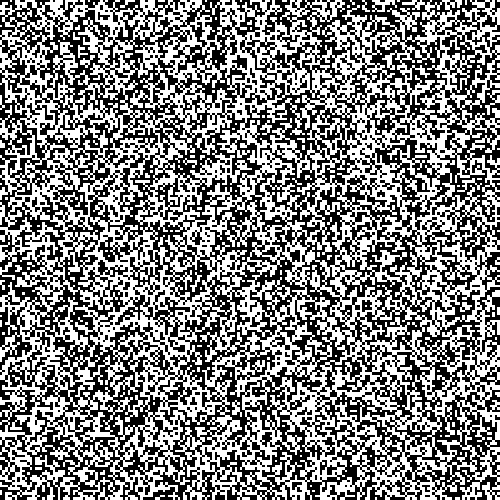

In [42]:
# image = Image.fromarray(create_random_image(n))
display(image.resize((500,500)))

In [ ]:
# reform_image_using_sa(image, pos_func, max_temp, min_temp, temp_func, cost_func_one, worst_delta_energy, inside_loop)
new_image = reform_image_using_sa(image, new_switch, 8, 0.1, lambda x: x*0.9999995, cost_one_want_close_same_type_cross_only, 10)

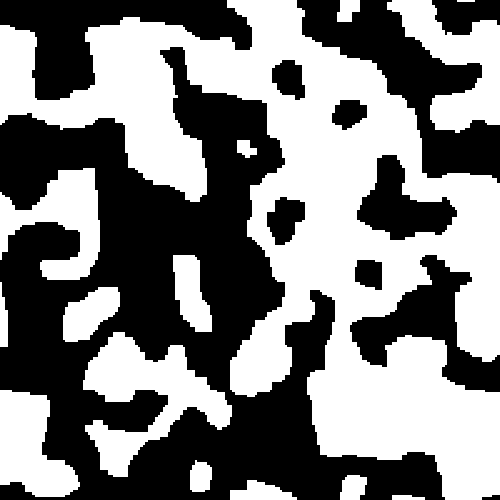

In [45]:
display(Image.fromarray(new_image).resize((500,500)))

 # Iteration counter

In [ ]:
c = 0
x = 8
while x > 0.1:
    x *= 0.9999995
    c+=1
print(c)